In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"C:\Users\sunil\Downloads\Real_estate Dataset - real_estate_data.csv")

In [8]:
df2 = df.copy()

In [9]:
df.head()

,Property_ID,Location,Property_Type,Price,Size_sqft,Bedrooms
0,P001,Mumbai,Villa,9000000.0,1136.0,2.0
1,P002,Chennai,Apartment,5400000.0,1828.0,NaN
2,P003,Hyderabad,Plot,NaN,897.0,3.0
3,P004,Delhi,Studio,7500000.0,NaN,2.0
4,P005,Delhi,Apartment,8900000.0,2906.0,2.0


In [10]:
df.shape

(52, 6)

In [11]:
# CHECKING NULL VALUES

print(df.isnull().sum()) 

Property_ID      0
Location         0
Property_Type    0
Price            7
Size_sqft        7
Bedrooms         7
dtype: int64


In [12]:
df.describe()

,Price,Size_sqft,Bedrooms
count,4.500000e+01,45.000000,45.000000
mean,8.186667e+06,1552.044444,2.600000
std,3.468010e+06,649.460824,0.939052
min,3.500000e+06,701.000000,1.000000
25%,5.400000e+06,1042.000000,2.000000
50%,8.200000e+06,1433.000000,3.000000
75%,1.020000e+07,1828.000000,3.000000
max,1.490000e+07,2906.000000,4.000000


In [13]:
# CHECKING OUTLIERS

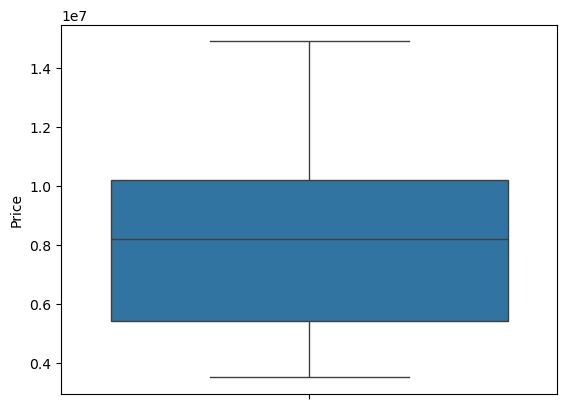

In [14]:
sns.boxplot(df['Price']);
plt.show()

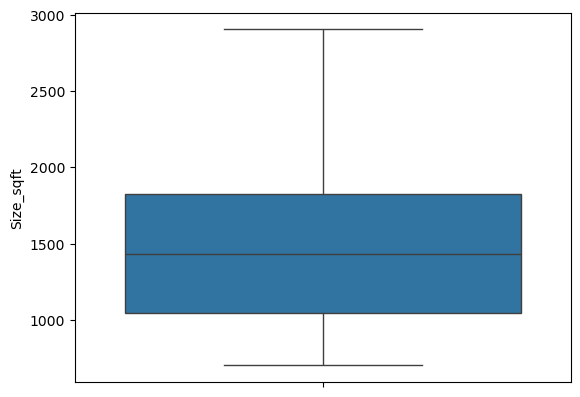

In [15]:
sns.boxplot(df['Size_sqft'])
plt.show()

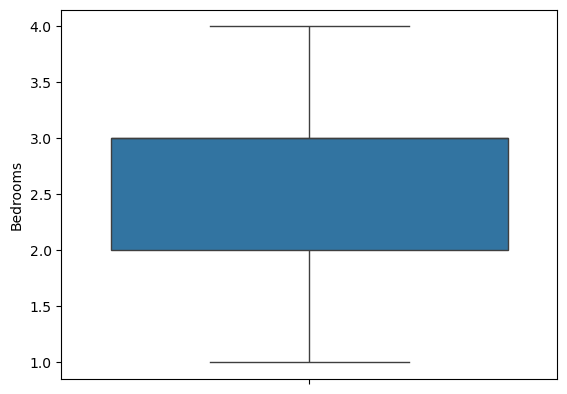

In [16]:
sns.boxplot(df['Bedrooms'])
plt.show()

In [17]:
# FILL THE NULL VALUES

In [18]:
Price_mean = df['Price'].mean()
Price_mean.round(1)

8186666.7

In [19]:
df['Price'] = df['Price'].fillna(Price_mean)

In [20]:
mean = df['Size_sqft'].mean()
mean.round(1)

1552.0

In [21]:
df['Size_sqft'] = df['Size_sqft'].fillna(mean)

In [22]:
mode = df['Bedrooms'].mode().sum()
mode

3.0

In [23]:
df['Bedrooms'] = df['Bedrooms'].fillna(mode)

In [24]:
df.isnull().sum()

Property_ID      0
Location         0
Property_Type    0
Price            0
Size_sqft        0
Bedrooms         0
dtype: int64

In [25]:
# CHECKING DUPLICATE VALUES

df.duplicated().sum()

2

In [26]:
df = df.drop_duplicates()

In [27]:
df.duplicated().sum()

0

In [28]:
df['Bedrooms'] = df['Bedrooms'].astype(int)
df['Size_sqft'] = df['Size_sqft'].astype(int)
df['Price'] = df['Price'] / 100000                        # PRICE IN LAKH

In [29]:
df.head()

,Property_ID,Location,Property_Type,Price,Size_sqft,Bedrooms
0,P001,Mumbai,Villa,90.000000,1136,2
1,P002,Chennai,Apartment,54.000000,1828,3
2,P003,Hyderabad,Plot,81.866667,897,3
3,P004,Delhi,Studio,75.000000,1552,2
4,P005,Delhi,Apartment,89.000000,2906,2


In [30]:
# PROPERTIES IN DELHI LESS THAN 10 LAKH HAVING MORE THAN 2 BEDROOMS

df[(df['Location'] == 'Delhi') & (df['Bedrooms'] > 2) & (df['Price'] < 10.0)]

,Property_ID,Location,Property_Type,Price,Size_sqft,Bedrooms


## Data visualization

In [31]:
# LOCATION WISE AVERAGE PRICE

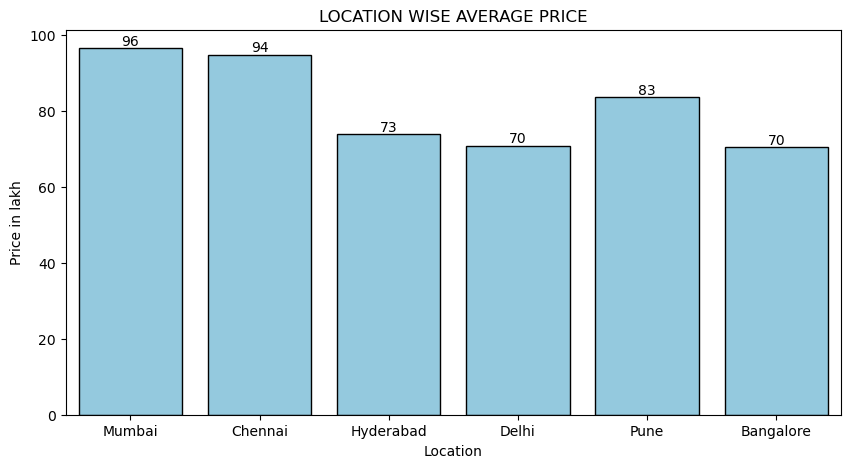

In [32]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x ='Location' ,y ='Price', data=df, estimator='mean',color='skyblue',edgecolor='black',errorbar=None)
plt.title('LOCATION WISE AVERAGE PRICE')
ax.bar_label(ax.containers[0], fmt='%d')
plt.xlabel('Location')
plt.ylabel('Price in lakh')
plt.show()

In [33]:
print('PRICE MEAN    :   ',df['Price'].mean())
print('PRICE MEDIAN  :   ',df['Price'].median())
print('PRICE MODE    :   ',df['Price'].mode()[0])

PRICE MEAN    :    82.18133333333333
PRICE MEDIAN  :    81.86666666666667
PRICE MODE    :    81.86666666666667


In [34]:
# JUST LOOK AT PRICE DISTRIBUTION

C:\Users\sunil\AppData\Local\Temp\ipykernel_9556\1194234943.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'],kde=True)


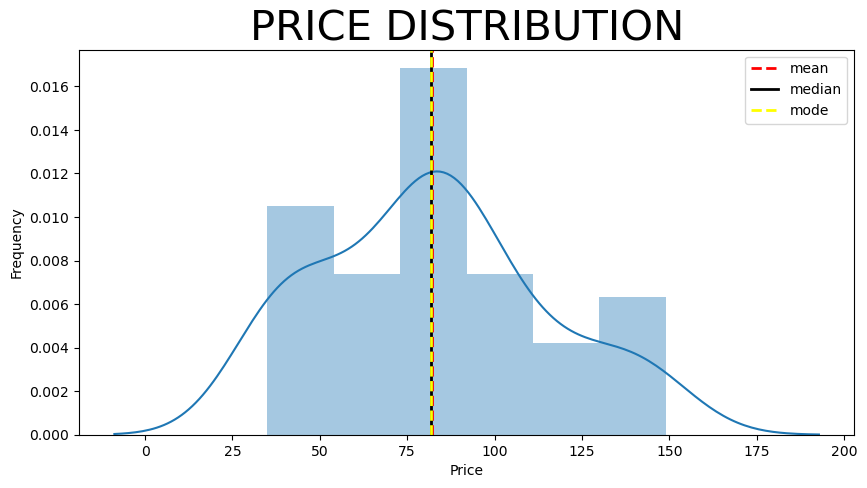

In [35]:
plt.figure(figsize = (10,5), dpi = 100)
sns.distplot(df['Price'],kde=True)
plt.axvline(df['Price'].mean(), color = 'red',linestyle= 'dashed', linewidth=2, label='mean')
plt.axvline(df['Price'].median(), color = 'black',linestyle= '-', linewidth=2, label='median')
plt.axvline(df['Price'].mode()[0], color = 'yellow',linestyle= 'dashed', linewidth=2 , label='mode')
plt.title('PRICE DISTRIBUTION', size = 30)
plt.xlabel('Price', size = 10)
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [36]:
# ADD NEW COLUMN OF PRICE PER SQUARE FOOT

In [37]:
df['Price_per_sqft'] = df['Price'] / df['Size_sqft']

In [38]:
df.head()

,Property_ID,Location,Property_Type,Price,Size_sqft,Bedrooms,Price_per_sqft
0,P001,Mumbai,Villa,90.000000,1136,2,0.079225
1,P002,Chennai,Apartment,54.000000,1828,3,0.029540
2,P003,Hyderabad,Plot,81.866667,897,3,0.091267
3,P004,Delhi,Studio,75.000000,1552,2,0.048325
4,P005,Delhi,Apartment,89.000000,2906,2,0.030626


In [39]:
# JUST A LOOK IN MUMBAI

In [40]:
Mumbai = df[df['Location'] == 'Mumbai']
Mumbai

,Property_ID,Location,Property_Type,Price,Size_sqft,Bedrooms,Price_per_sqft
0,P001,Mumbai,Villa,90.0,1136,2,0.079225
6,P007,Mumbai,Plot,112.0,2672,3,0.041916
8,P009,Mumbai,Villa,73.0,1600,3,0.045625
32,P033,Mumbai,Plot,99.0,1210,2,0.081818
39,P040,Mumbai,Villa,38.0,2893,3,0.013135
47,P048,Mumbai,Villa,149.0,1616,4,0.092203
48,P049,Mumbai,Villa,115.0,1042,2,0.110365


In [41]:
# MUMBAI RATE

In [42]:
Mumbai.groupby('Property_Type')['Price'].agg(avg='mean',min='min', max='max')

,avg,min,max
Property_Type,,,
Plot,105.5,99.0,112.0
Villa,93.0,38.0,149.0


In [43]:
# IN MUMBAI PLOT TYPE AND BEDROOMS AVAILABILITY

In [44]:
pd.crosstab(Mumbai['Property_Type'], Mumbai['Bedrooms'])

Bedrooms,2,3,4
Property_Type,,,
Plot,1,1,0
Villa,2,2,1


In [45]:
# JUST LOOK IN DELHI

In [46]:
Delhi = df[df['Location'] ==  'Delhi']
Delhi

,Property_ID,Location,Property_Type,Price,Size_sqft,Bedrooms,Price_per_sqft
3,P004,Delhi,Studio,75.000000,1552,2,0.048325
4,P005,Delhi,Apartment,89.000000,2906,2,0.030626
5,P006,Delhi,Apartment,36.000000,900,3,0.040000
12,P013,Delhi,Apartment,65.000000,1552,3,0.041881
20,P021,Delhi,Studio,82.000000,1681,2,0.048780
23,P024,Delhi,Plot,81.866667,1552,1,0.052749
29,P030,Delhi,Villa,92.000000,2351,2,0.039132
34,P035,Delhi,Villa,36.000000,1206,4,0.029851
41,P042,Delhi,Apartment,81.000000,1233,2,0.065693


In [47]:
# DELHI RATE

In [48]:
Delhi.groupby('Property_Type')['Price'].agg(Average='mean', Max='max', Min='min')

,Average,Max,Min
Property_Type,,,
Apartment,67.750000,89.000000,36.000000
Plot,81.866667,81.866667,81.866667
Studio,78.500000,82.000000,75.000000
Villa,64.000000,92.000000,36.000000


In [49]:
# IN DELHI PLOT TYPE AND BEDROOMS AVAILABILITY

In [50]:
pd.crosstab(Delhi['Property_Type'], Delhi['Bedrooms'])

Bedrooms,1,2,3,4
Property_Type,,,,
Apartment,0,2,2,0
Plot,1,0,0,0
Studio,0,2,0,0
Villa,0,1,0,1


In [51]:
# YOU CAN SEE ALL PROPERTIES TYPE COMPARISION WITH PRICE

In [52]:
df.groupby(['Location','Property_Type','Bedrooms'])['Price'].agg(Average_Price='mean', Min_Price='min', Max_price='max')

Average_Price   Min_Price   Max_price
Location  Property_Type Bedrooms                                       
Bangalore Apartment     3             71.433333   61.000000   81.866667
                        4            101.000000  101.000000  101.000000
          Studio        3             63.000000   60.000000   66.000000
          Villa         3             81.866667   81.866667   81.866667
                        4             41.000000   41.000000   41.000000
Chennai   Apartment     2            116.000000  116.000000  116.000000
                        3             47.000000   40.000000   54.000000
          Plot          1             83.000000   83.000000   83.000000
                        3            138.000000  138.000000  138.000000
                        4            130.000000  130.000000  130.000000
          Studio        2            100.500000   99.000000  102.000000
          Villa         3            139.000000  139.000000  139.000000
Delhi     Apartment     2             85.000000   81.000000   89.000000
                        3             50.500000   36.000000   65.000000
          Plot          1             81.866667   81.866667   81.866667
          Studio        2             78.500000   75.000000   82.000000
          Villa         2             92.000000   92.000000   92.000000
                        4             36.000000   36.000000   36.000000
Hyderabad Apartment     1             37.000000   37.000000   37.000000
                        3             83.933333   81.866667   86.000000
          Plot          3             81.866667   81.866667   81.866667
          Studio        3            141.000000  141.000000  141.000000
          Villa         1             36.000000   36.000000   36.000000
                        3             54.000000   54.000000   54.000000
Mumbai    Plot          2             99.000000   99.000000   99.000000
                        3            112.000000  112.000000  112.000000
          Villa         2            102.500000   90.000000  115.000000
                        3             55.500000   38.000000   73.000000
                        4            149.000000  149.000000  149.000000
Pune      Apartment     1             43.000000   43.000000   43.000000
                        2             97.000000   97.000000   97.000000
          Plot          2             81.866667   81.866667   81.866667
                        4             81.866667   81.866667   81.866667
          Studio        2            123.000000  123.000000  123.000000
                        3             79.000000   79.000000   79.000000
          Villa         1             57.000000   57.000000   57.000000
                        3            145.000000  145.000000  145.000000
                        4             64.500000   35.000000   94.000000

In [53]:
# YOU CAN SEE ALL COMPARISION WITH PRICE_PER_SQUARE_FOOT

In [54]:
df.groupby(['Location','Property_Type'])['Price_per_sqft'].agg(Average_Price='mean', Min_Price='min', Max_price='max')

Average_Price  Min_Price  Max_price
Location  Property_Type                                     
Bangalore Apartment           0.055729   0.046038   0.065077
          Studio              0.068653   0.058150   0.079156
          Villa               0.052711   0.028044   0.077379
Chennai   Apartment           0.034237   0.016992   0.051237
          Plot                0.077848   0.053479   0.096301
          Studio              0.062358   0.044619   0.080097
          Villa               0.120870   0.120870   0.120870
Delhi     Apartment           0.044550   0.030626   0.065693
          Plot                0.052749   0.052749   0.052749
          Studio              0.048553   0.048325   0.048780
          Villa               0.034492   0.029851   0.039132
Hyderabad Apartment           0.048862   0.023840   0.083984
          Plot                0.091267   0.091267   0.091267
          Studio              0.077218   0.077218   0.077218
          Villa               0.026899   0.019115   0.034682
Mumbai    Plot                0.061867   0.041916   0.081818
          Villa               0.068111   0.013135   0.110365
Pune      Apartment           0.080820   0.034510   0.127130
          Plot                0.046263   0.040348   0.052178
          Studio              0.059575   0.045586   0.073565
          Villa               0.096579   0.035012   0.179455

In [55]:
# YOU CAN SEE ALL LOCATION COMPARISION WITH PRICE_PER_SQUARE_FOOT

In [56]:
df.groupby(['Property_Type','Location'])['Price_per_sqft'].agg(Average_Price='mean', Min_Price='min', Max_price='max')


Average_Price  Min_Price  Max_price
Property_Type Location                                      
Apartment     Bangalore       0.055729   0.046038   0.065077
              Chennai         0.034237   0.016992   0.051237
              Delhi           0.044550   0.030626   0.065693
              Hyderabad       0.048862   0.023840   0.083984
              Pune            0.080820   0.034510   0.127130
Plot          Chennai         0.077848   0.053479   0.096301
              Delhi           0.052749   0.052749   0.052749
              Hyderabad       0.091267   0.091267   0.091267
              Mumbai          0.061867   0.041916   0.081818
              Pune            0.046263   0.040348   0.052178
Studio        Bangalore       0.068653   0.058150   0.079156
              Chennai         0.062358   0.044619   0.080097
              Delhi           0.048553   0.048325   0.048780
              Hyderabad       0.077218   0.077218   0.077218
              Pune            0.059575   0.045586   0.073565
Villa         Bangalore       0.052711   0.028044   0.077379
              Chennai         0.120870   0.120870   0.120870
              Delhi           0.034492   0.029851   0.039132
              Hyderabad       0.026899   0.019115   0.034682
              Mumbai          0.068111   0.013135   0.110365
              Pune            0.096579   0.035012   0.179455

In [57]:
# YOU CAN SEE ALL LOCATION COMPARISION WITH PRICE

In [58]:
df.groupby(['Property_Type','Location','Bedrooms'])['Price'].agg(Average_Price='mean', Min_Price='min', Max_price='max')

Average_Price   Min_Price   Max_price
Property_Type Location  Bedrooms                                       
Apartment     Bangalore 3             71.433333   61.000000   81.866667
                        4            101.000000  101.000000  101.000000
              Chennai   2            116.000000  116.000000  116.000000
                        3             47.000000   40.000000   54.000000
              Delhi     2             85.000000   81.000000   89.000000
                        3             50.500000   36.000000   65.000000
              Hyderabad 1             37.000000   37.000000   37.000000
                        3             83.933333   81.866667   86.000000
              Pune      1             43.000000   43.000000   43.000000
                        2             97.000000   97.000000   97.000000
Plot          Chennai   1             83.000000   83.000000   83.000000
                        3            138.000000  138.000000  138.000000
                        4            130.000000  130.000000  130.000000
              Delhi     1             81.866667   81.866667   81.866667
              Hyderabad 3             81.866667   81.866667   81.866667
              Mumbai    2             99.000000   99.000000   99.000000
                        3            112.000000  112.000000  112.000000
              Pune      2             81.866667   81.866667   81.866667
                        4             81.866667   81.866667   81.866667
Studio        Bangalore 3             63.000000   60.000000   66.000000
              Chennai   2            100.500000   99.000000  102.000000
              Delhi     2             78.500000   75.000000   82.000000
              Hyderabad 3            141.000000  141.000000  141.000000
              Pune      2            123.000000  123.000000  123.000000
                        3             79.000000   79.000000   79.000000
Villa         Bangalore 3             81.866667   81.866667   81.866667
                        4             41.000000   41.000000   41.000000
              Chennai   3            139.000000  139.000000  139.000000
              Delhi     2             92.000000   92.000000   92.000000
                        4             36.000000   36.000000   36.000000
              Hyderabad 1             36.000000   36.000000   36.000000
                        3             54.000000   54.000000   54.000000
              Mumbai    2            102.500000   90.000000  115.000000
                        3             55.500000   38.000000   73.000000
                        4            149.000000  149.000000  149.000000
              Pune      1             57.000000   57.000000   57.000000
                        3            145.000000  145.000000  145.000000
                        4             64.500000   35.000000   94.000000